## Student Performance Indicator

### Life Cycle of ML Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
df= pd.read_csv('Data\stud.csv')

In [20]:
df.head()

,gender,ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [22]:
## Missing values
df.isnull().sum()

gender                0
ethnicity             0
parental_education    0
lunch                 0
test_prep_course      0
math_score            0
reading_score         0
writing_score         0
dtype: int64

**No Missing Values**

In [23]:
## check Duplicates
df.duplicated().sum()

np.int64(0)

**No Duplicate Records Found**

In [24]:
## Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep_course    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
## Number of Unique values in each col
df.nunique()

gender                 2
ethnicity              5
parental_education     6
lunch                  2
test_prep_course       2
math_score            81
reading_score         72
writing_score         77
dtype: int64

In [26]:
## Statistics for numeric cols
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [27]:
## Unique Category in Categorical Cols
for col in df.columns:
    if df[col].dtype=="O":
        x = df[col].unique()
        print(f"->  {col} : {x}",end='\n\n')

->  gender : ['female' 'male']

->  ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

->  parental_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

->  lunch : ['standard' 'free/reduced']

->  test_prep_course : ['none' 'completed']



In [28]:
num_cols=[]
cat_cols = []
for col in df.columns:
    if df[col].dtype=="O":
        cat_cols.append(col)
    else:
        num_cols.append(col)
print(f"Numerical cols : {num_cols}")
print(f"Categorycal cols : {cat_cols}")

Numerical cols : ['math_score', 'reading_score', 'writing_score']
Categorycal cols : ['gender', 'ethnicity', 'parental_education', 'lunch', 'test_prep_course']


**Creating Total Score & Avg Score Column**

In [29]:
df.head()

,gender,ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=df['total_score']/3
df.head()

,gender,ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
math_full = len(df[df['math_score']==100])
reading_full = len(df[df['reading_score']==100])
writing_full = len(df[df['writing_score']==100])
print(f"- number of students with full marks in math : {math_full}")
print(f"- number of students with full marks in reading : {reading_full}")
print(f"- number of students with full marks in writing : {writing_full}")

- number of students with full marks in math : 7
- number of students with full marks in reading : 17
- number of students with full marks in writing : 14


In [33]:
df.describe()

,math_score,reading_score,writing_score,total_score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [34]:
all_full = len(df[df['avg_score']==100])
print(f"- There are {all_full} students who got full marks in all tests.")

- There are 3 students who got full marks in all tests.


In [35]:
math_less_20 = len(df[df['math_score']<=20])
reading_less_20 = len(df[df['reading_score']<=20])
writing_less_20 = len(df[df['writing_score']<=20])
print(f"- number of students with less than 20 marks in math : {math_less_20}")
print(f"- number of students with less than 20 marks in reading : {reading_less_20}")
print(f"- number of students with less than 20 marks in writing : {writing_less_20}")

- number of students with less than 20 marks in math : 4
- number of students with less than 20 marks in reading : 1
- number of students with less than 20 marks in writing : 3


#### Histogram and KDE

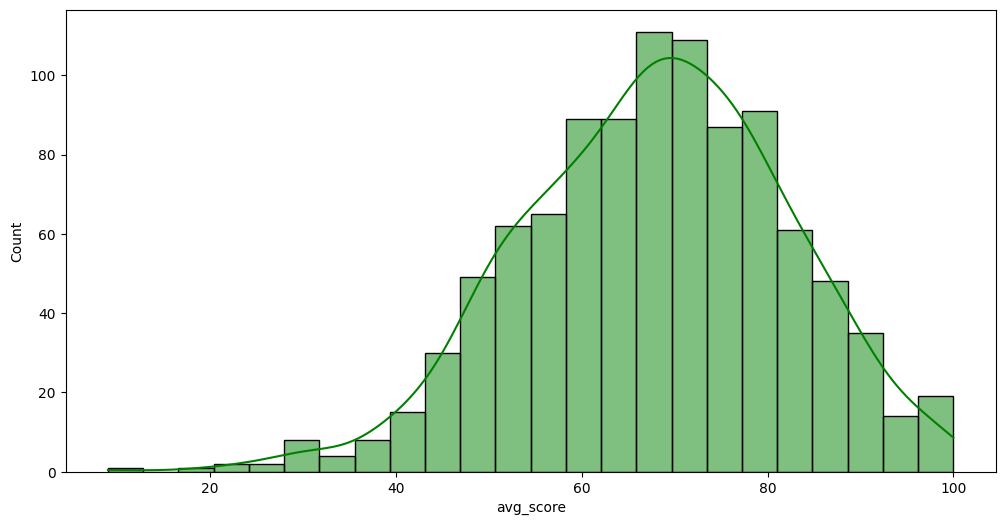

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x = 'avg_score',color='g',kde=True)
plt.show()

- avg score follows nearly gaussian distribution.

In [37]:
len(cat_cols)

5

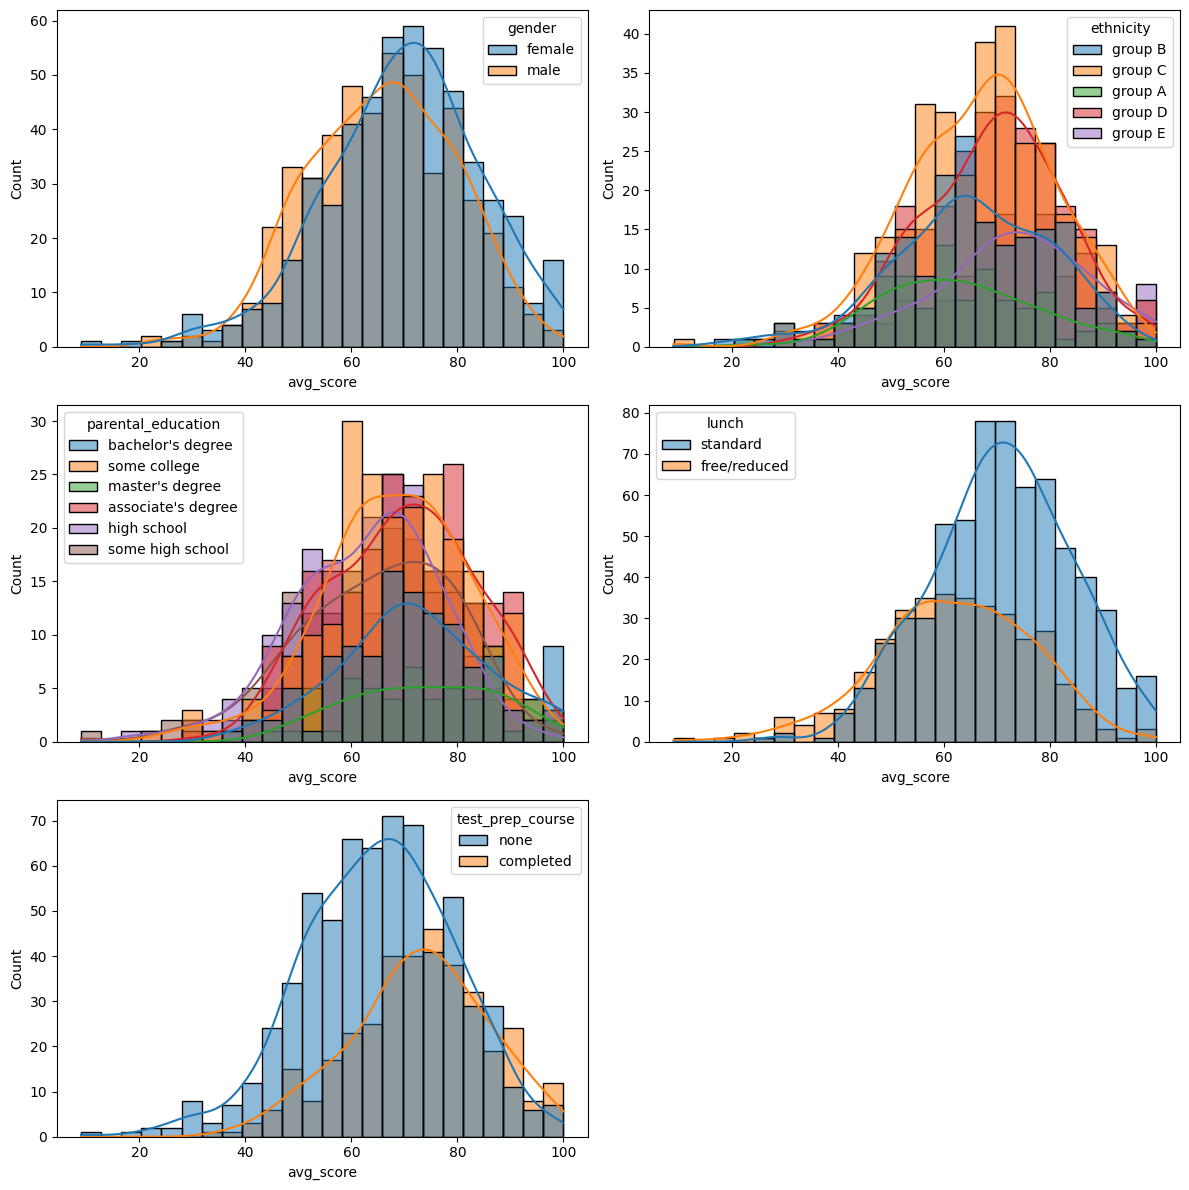

In [38]:
plt.figure(figsize=(12,12))
i=1
for col in cat_cols:
    plt.subplot(3,2,i)
    sns.histplot(data=df,x = 'avg_score',hue=col,kde=True)
    plt.tight_layout()
    i+=1
plt.show()

#### Analysis Summary of Student Performance

- **Gender:**
  - Female students tend to slightly outperform male students in average scores.

- **Ethnicity (Race/Ethnicity Groups):**
  - Groups **C, D, and E** show better average scores.
  - **Group A** consistently performs worse compared to others.

- **Parental Level of Education:**
  - Higher parental education (e.g., bachelor’s or master’s degree) is **slightly associated** with better 
    student performance.
  - However, the effect is **not very strong**; significant overlap exists across all education levels.

- **Lunch Type:**
  - Students with **standard lunch** score higher on average than those with **free/reduced lunch**.
  - This may reflect differences in **socioeconomic background**.

- **Test Preparation Course:**
  - Students who **completed** the test preparation course performed **significantly better** than those 
    who did not.

---

> These insights suggest that while certain demographic and socioeconomic factors influence performance, 
  targeted support like test preparation can have a strong positive impact.


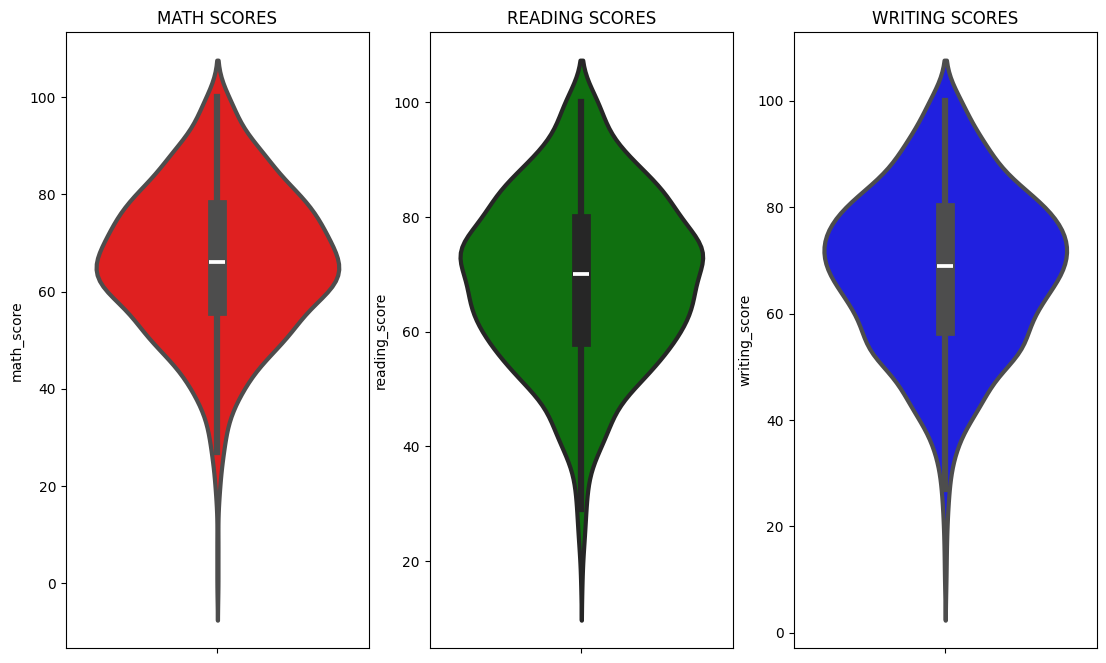

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

> most of the students scoerd in between 55 - 80 in each test.


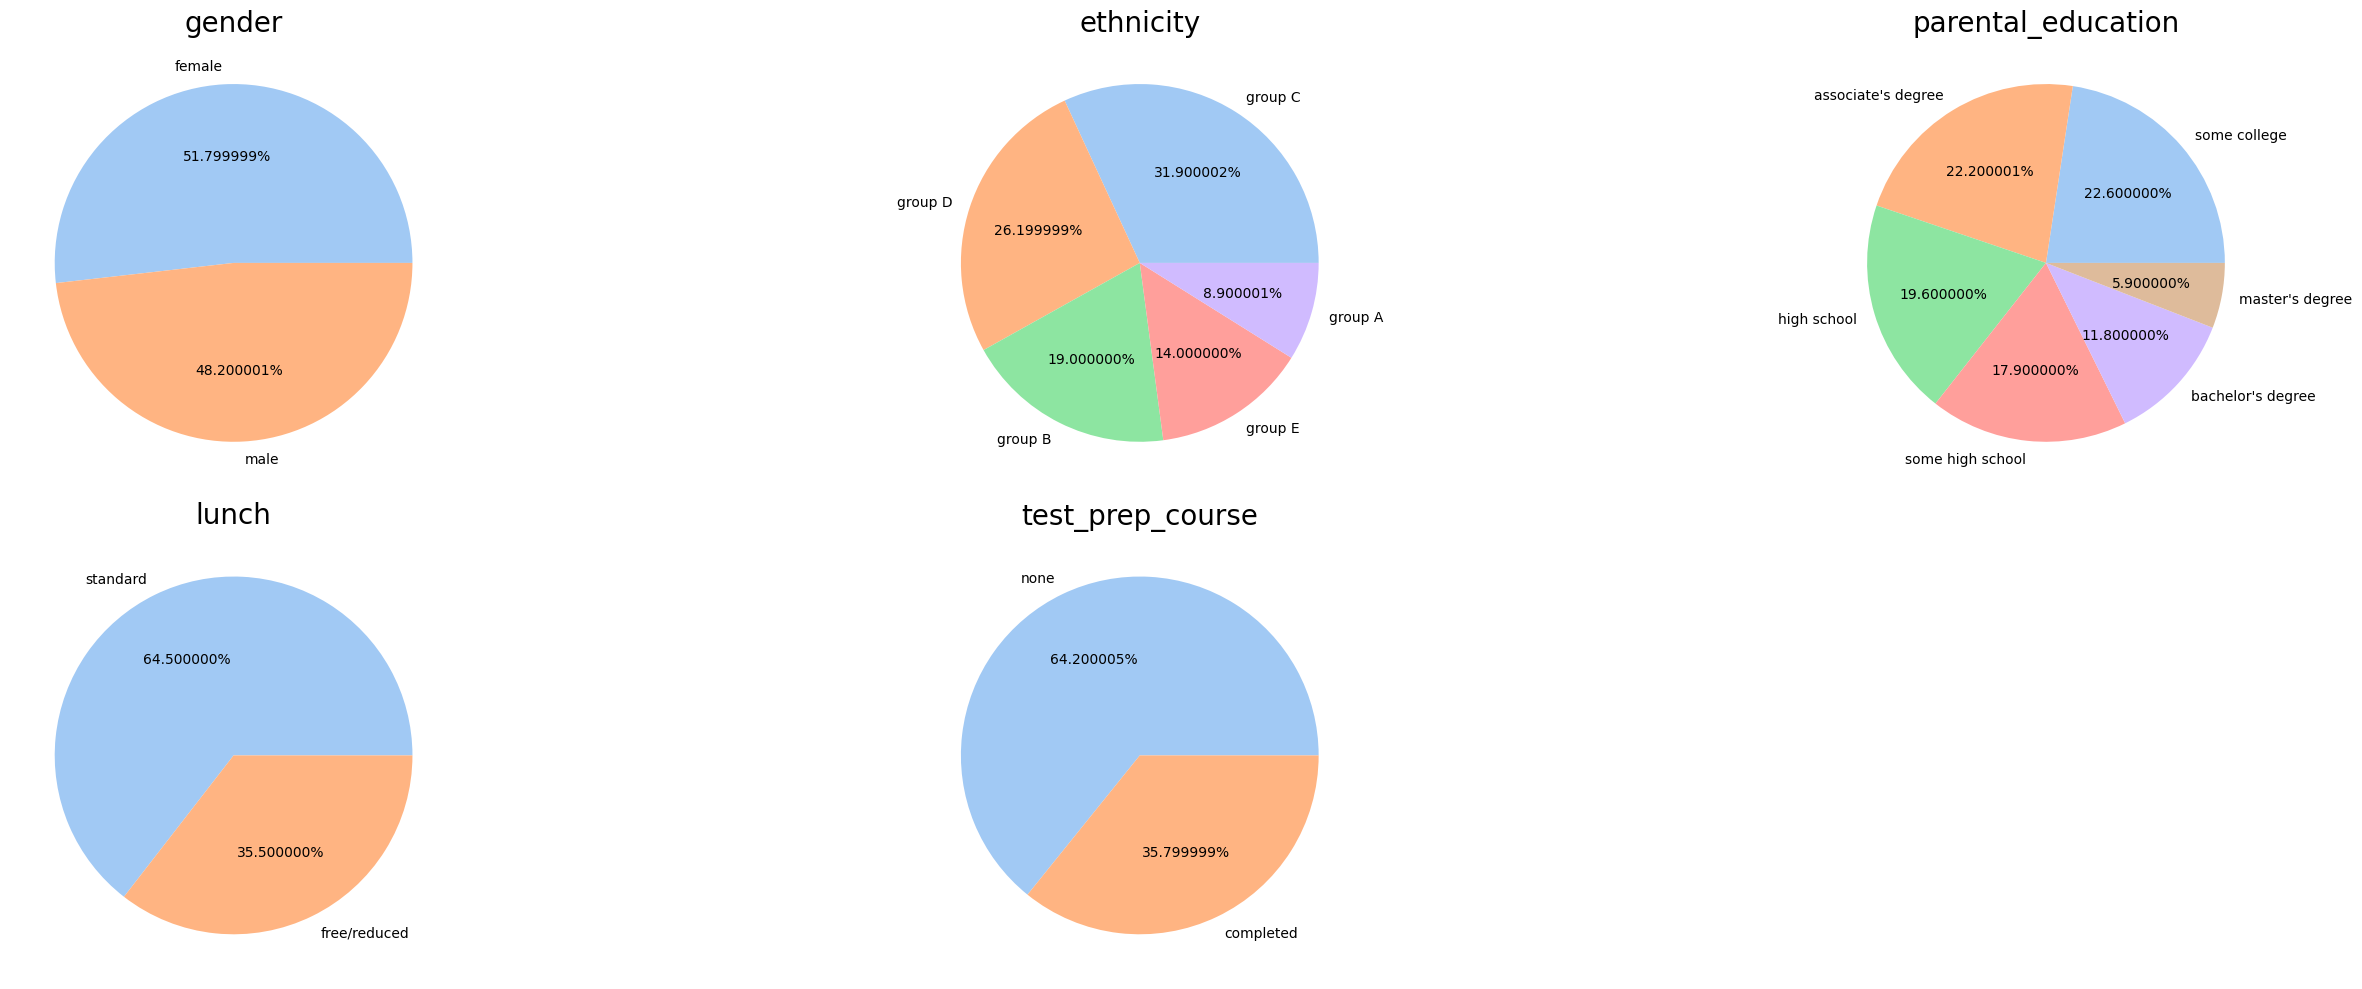

In [41]:
plt.figure(figsize=(30,10))
i=1

for col in cat_cols:
    size = df[col].value_counts()
    labels=size.index
    color = sns.color_palette('pastel', n_colors=len(labels))
    plt.subplot(2,3,i)
    plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
    plt.title(col, fontsize = 20)
    plt.axis('off')
    i+=1
    plt.tight_layout()
plt.show()

>> ##### Observation:

- number of male and female students are nearly equal.

- most of the students belongs from Gr C & D where number of Gr A students is less.

- least number of students with parental education master degree. most number of student with 
  parental education of some college and associated degree.

- more number of students have standard lunch before exam.

- more number of students have not completed their test preparation course.


>> ### Checking Outliers

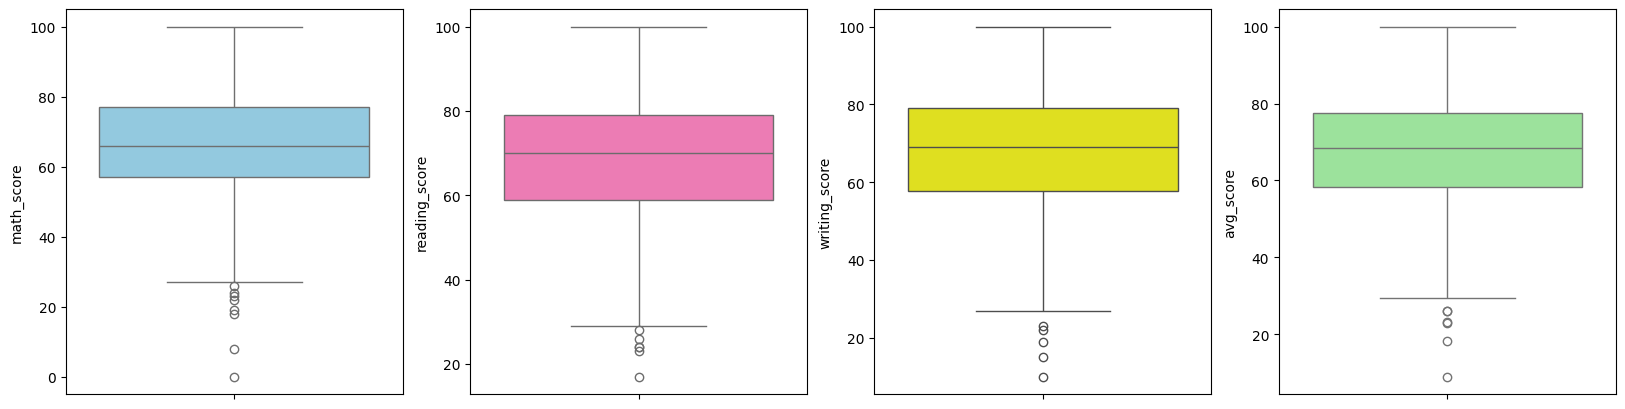

In [42]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

>> ##### Multivariate Analysis:

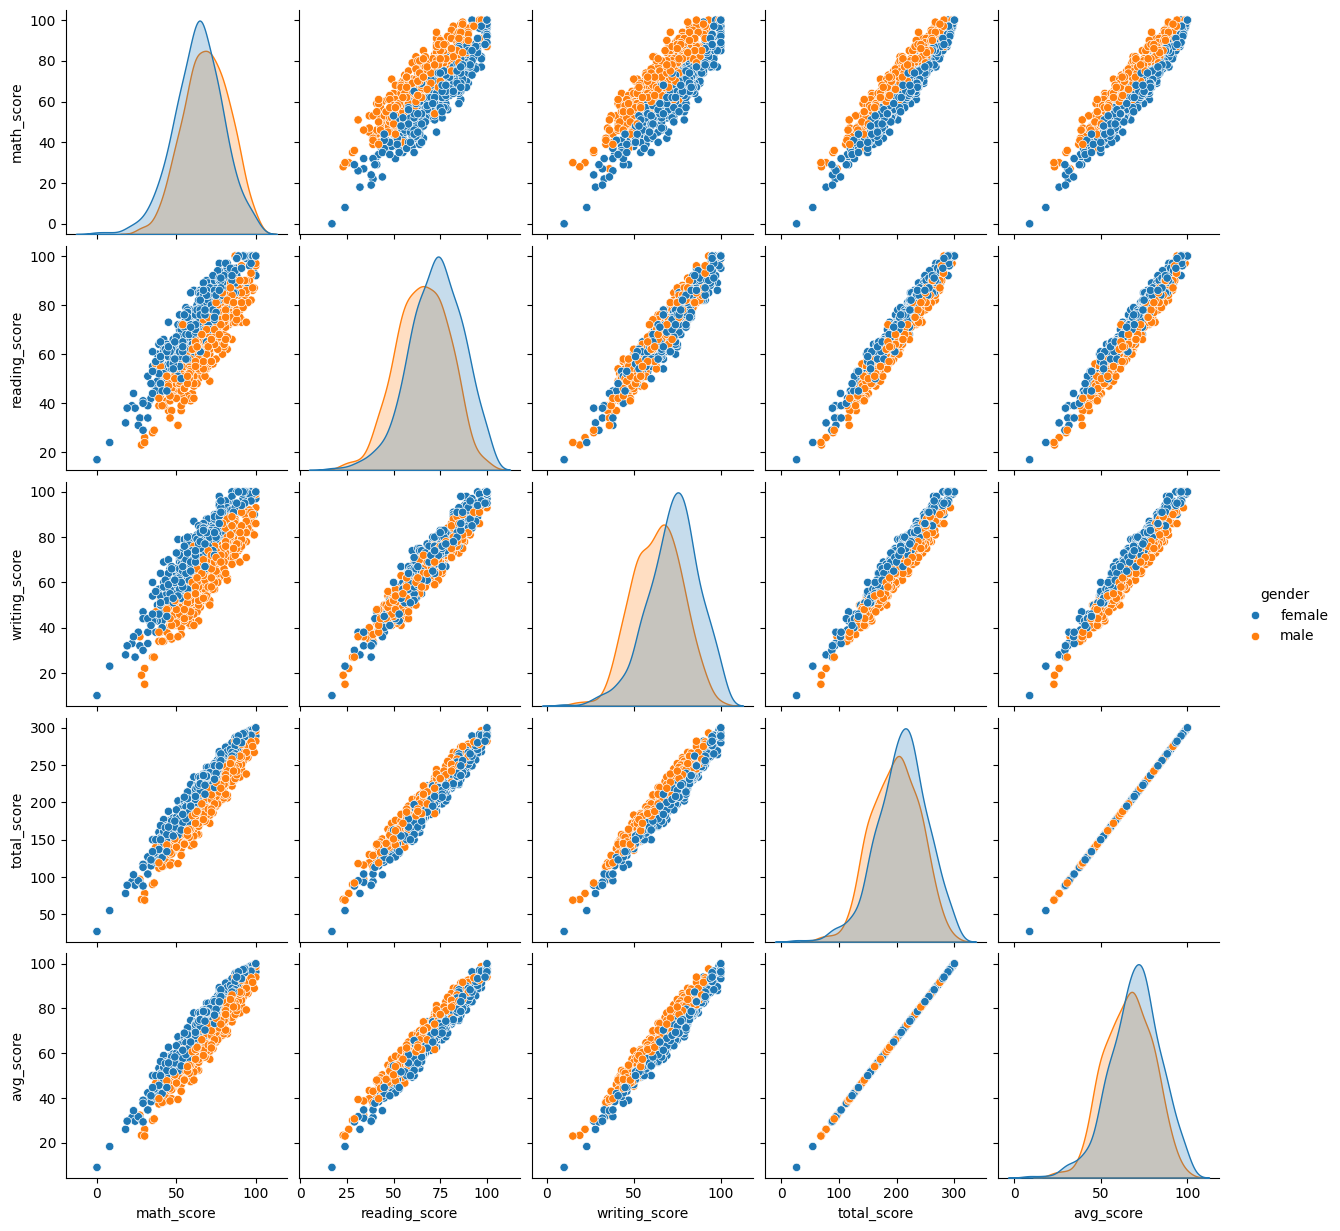

In [43]:
sns.pairplot(df,hue = 'gender')
plt.show()

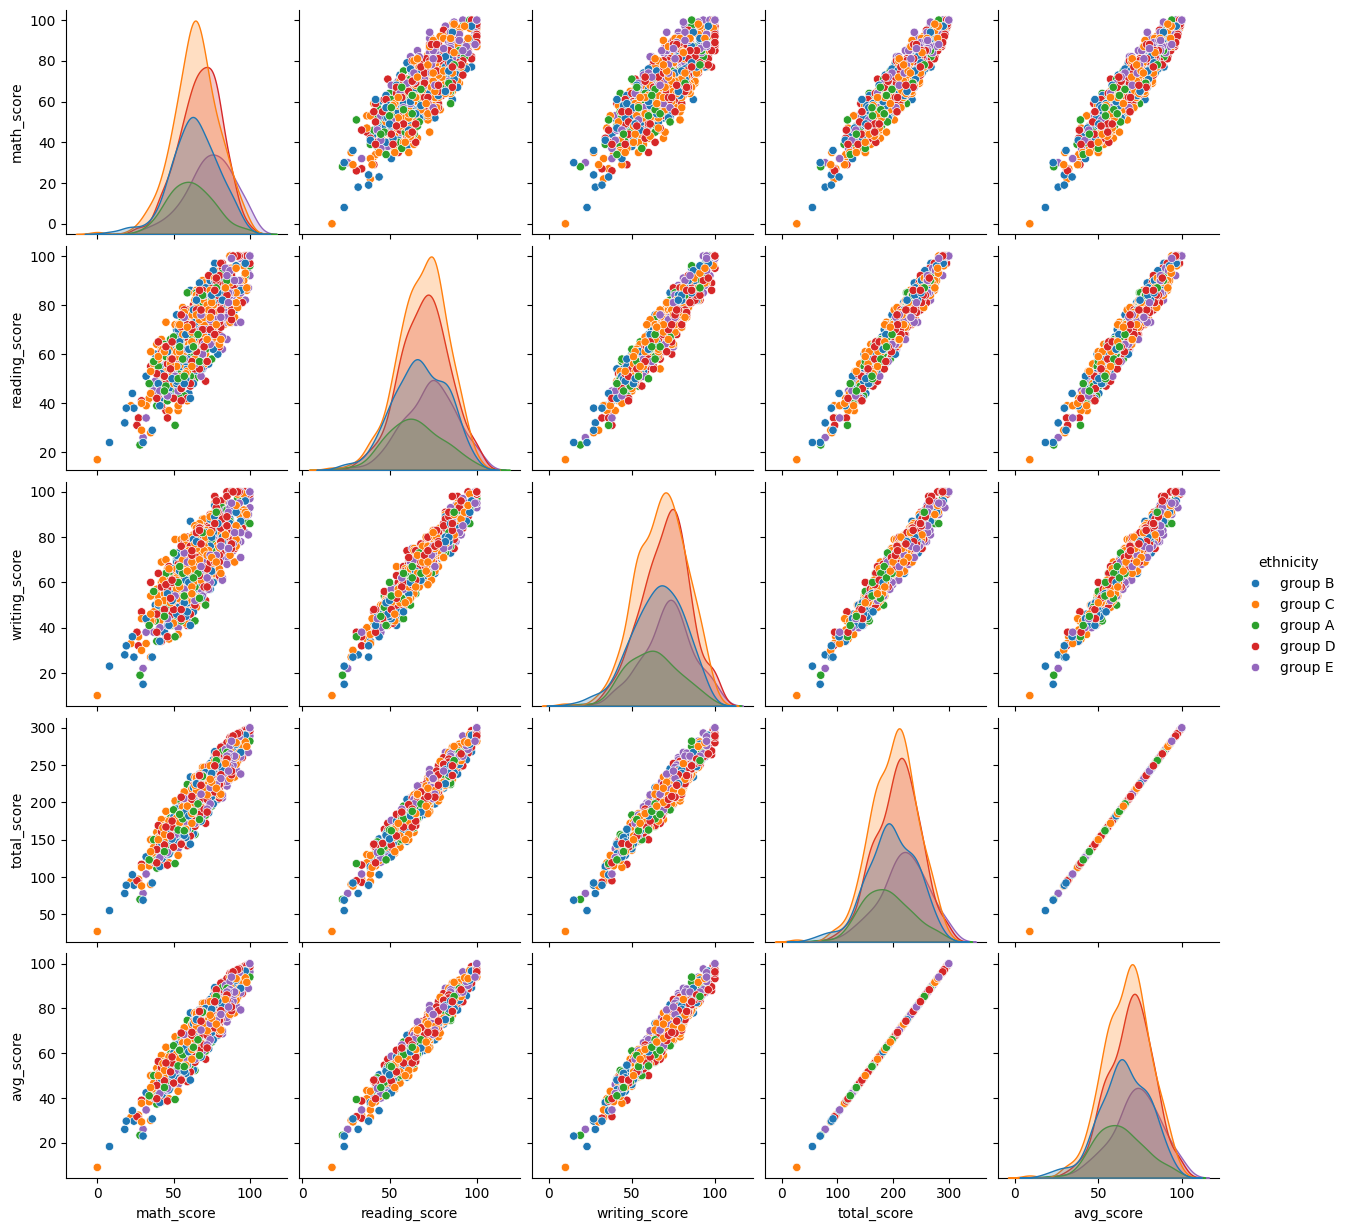

In [44]:
sns.pairplot(df,hue = 'ethnicity')
plt.show()

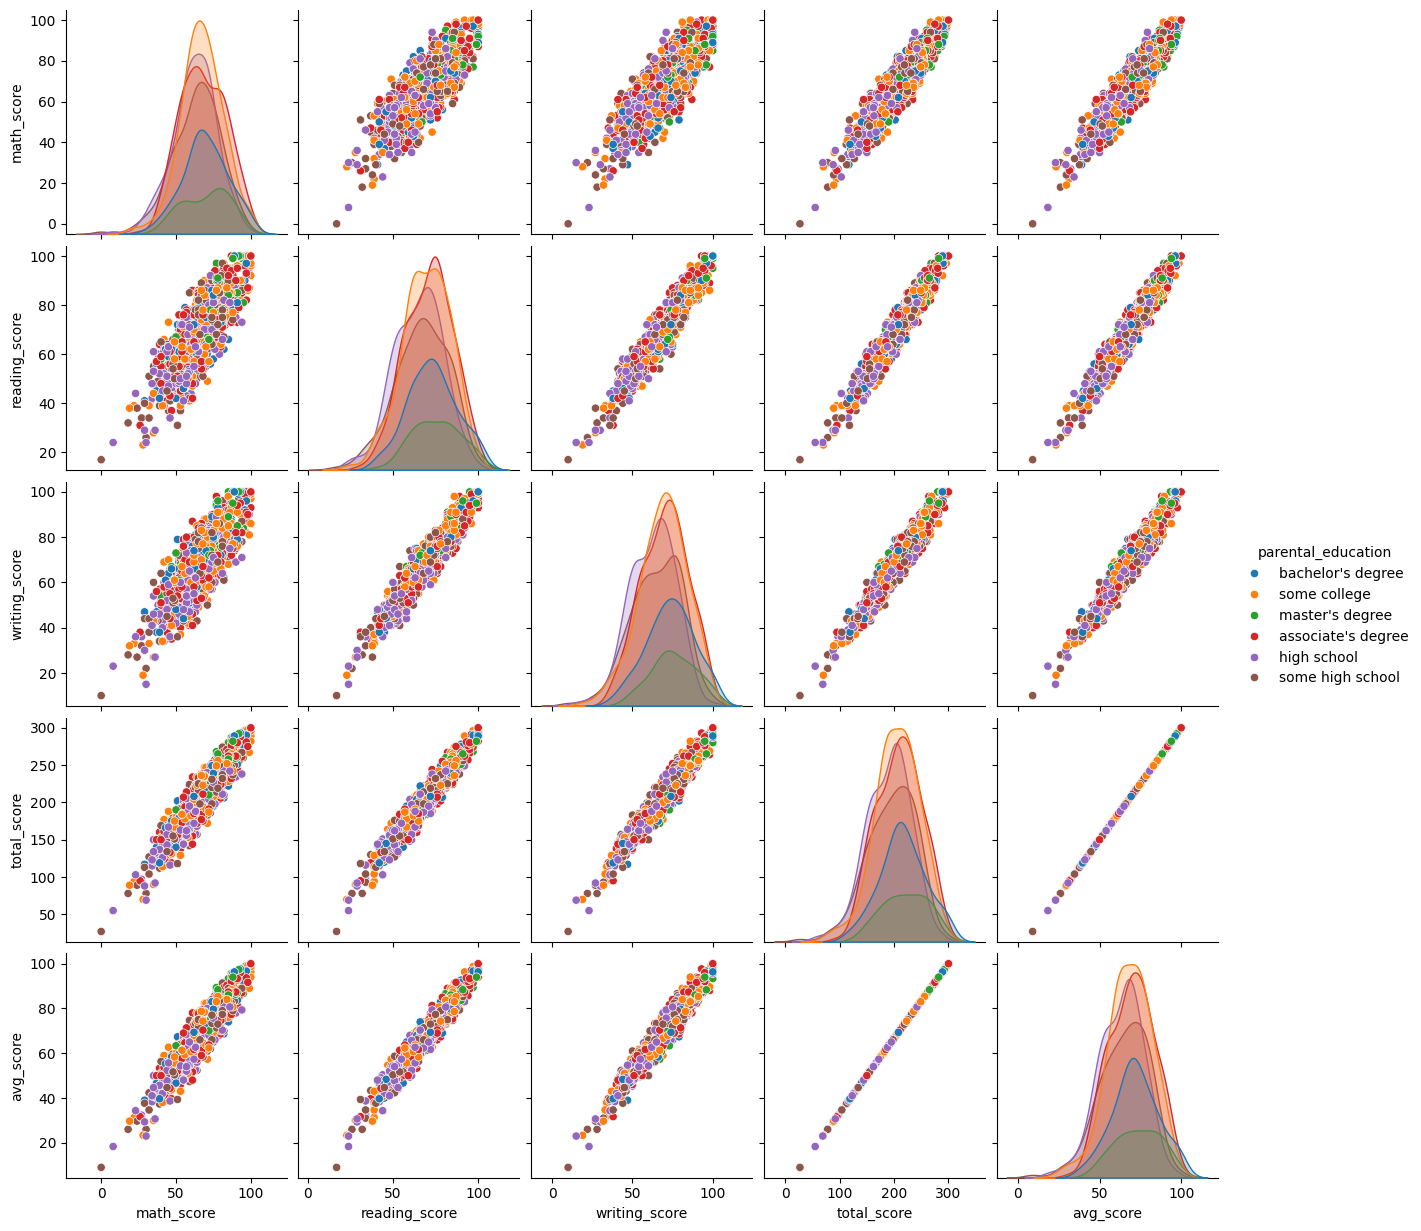

In [45]:
sns.pairplot(df,hue='parental_education')
plt.show()

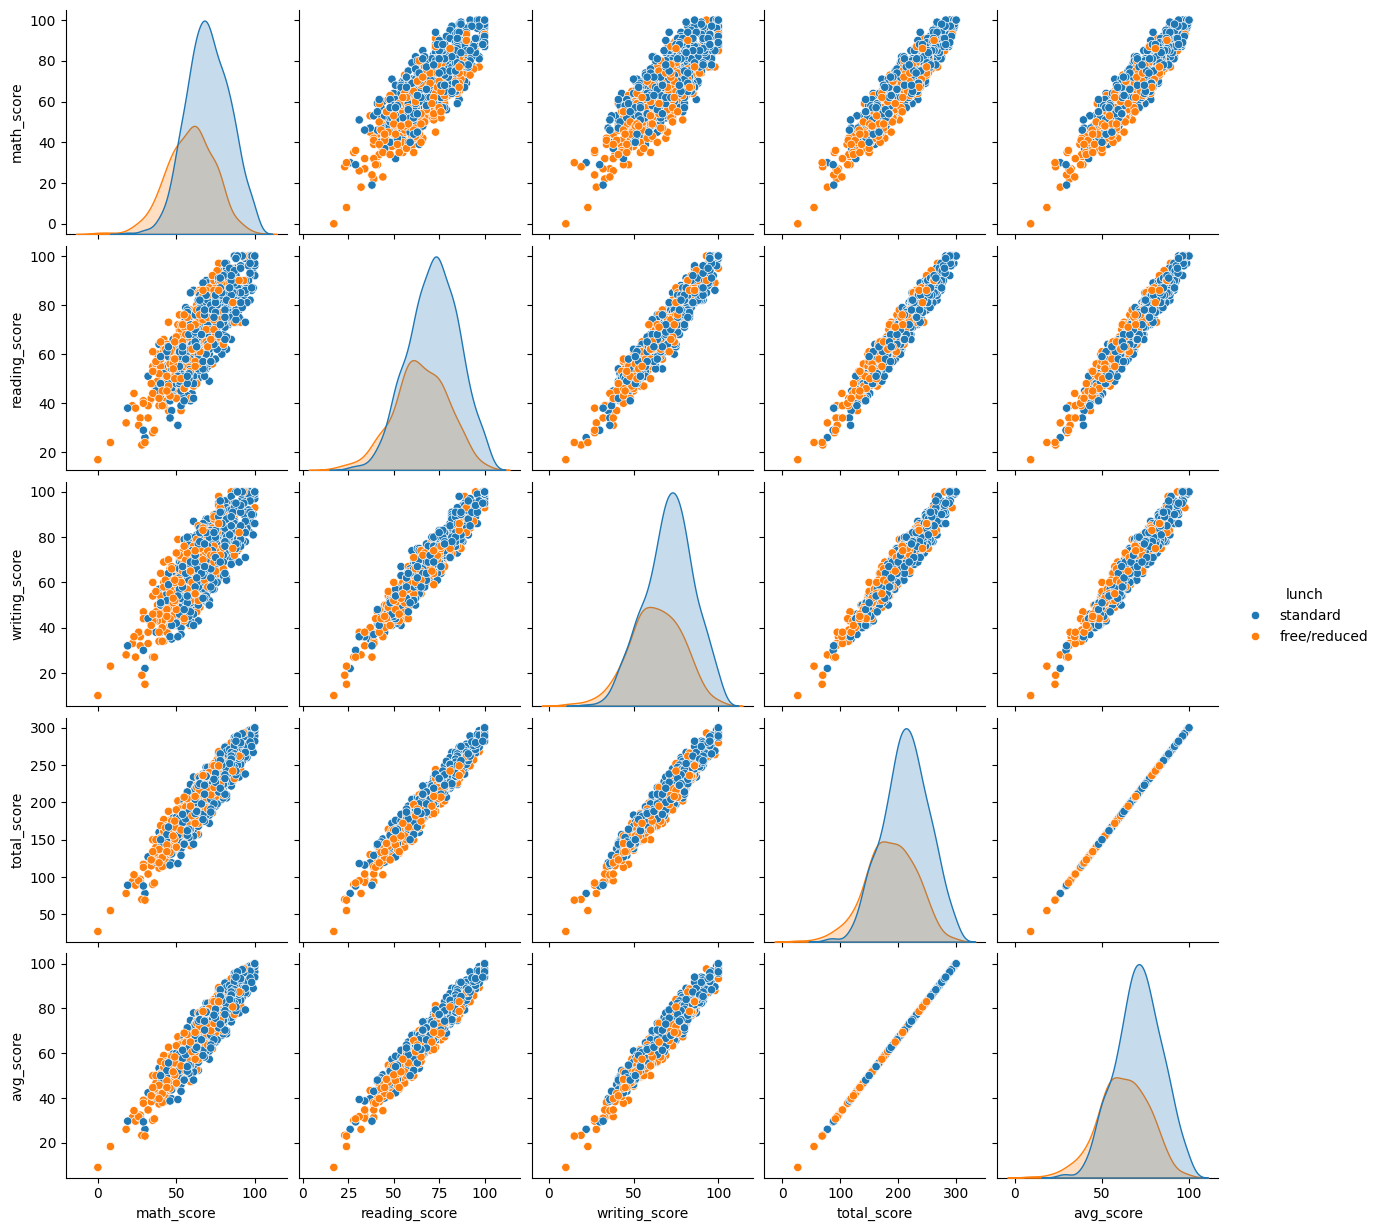

In [46]:
sns.pairplot(df,hue='lunch')
plt.show()

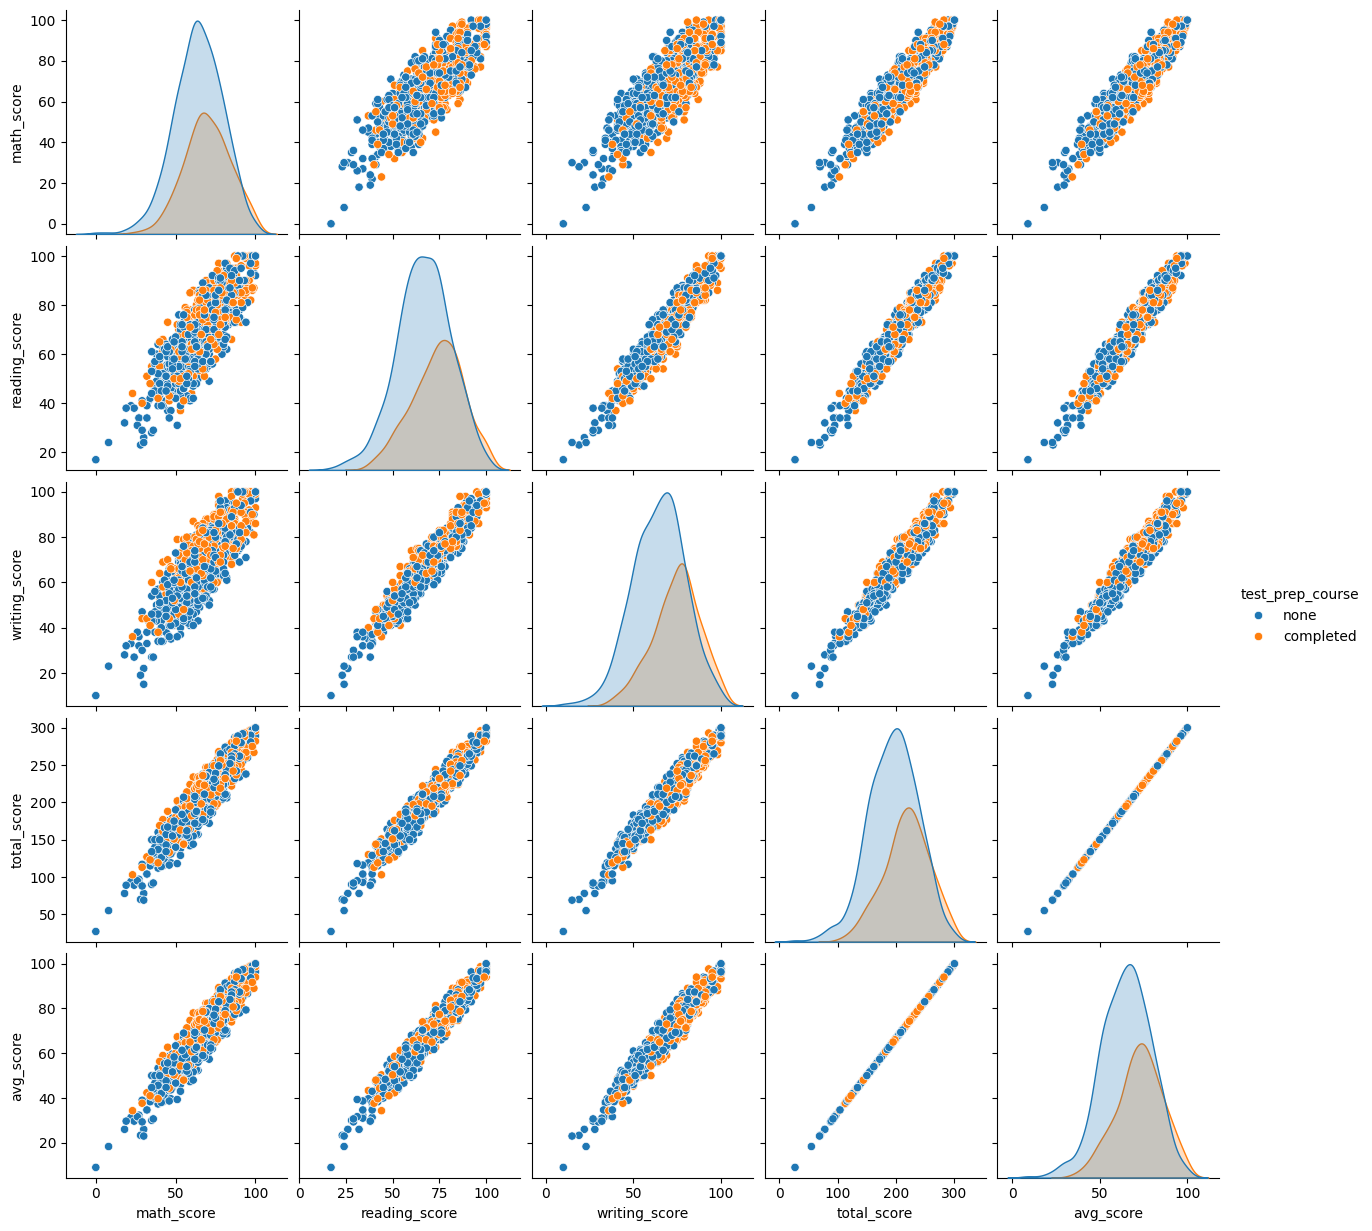

In [47]:
sns.pairplot(df,hue='test_prep_course')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.